In [1]:
import math

import ROOT as rt
import array as arr

from strangehelper import get_parabola

Welcome to JupyROOT 6.26/10


In [2]:
rt.gStyle.SetOptStat(0)

In [3]:
c = rt.TCanvas("c", "c", 800, 600)
c.SetRightMargin(0.05)
c.SetLeftMargin(0.13)
c.SetBottomMargin(0.13)
c.SetTopMargin(0.05)

In [4]:
is_low_pt = False
is_high_pt = True
is_normal_pt = False
assert sum([is_low_pt, is_high_pt, is_normal_pt]) == 1, "only one pt range pls"

use_new_x_axis = True
lambda_phi_ratio = False
use_uncor_syst = True

In [5]:
if is_low_pt:
    graph_infile = rt.TFile("output/systematics/final_yield_ratio_syst_newnch_lowpt.root")
elif is_high_pt:
    graph_infile = rt.TFile("output/systematics/final_yield_ratio_syst_newnch_highpt.root")
else:
    graph_infile = rt.TFile("output/systematics/final_yield_ratio_syst_newnch.root")

# if is_low_pt:
#     graph_infile = rt.TFile("output/systematics/final_yield_ratio_syst_lowpt.root")
# elif is_high_pt:
#     graph_infile = rt.TFile("output/systematics/final_yield_ratio_syst_highpt.root")
# else:
#     graph_infile = rt.TFile("output/systematics/final_yield_ratio_syst.root")

if use_uncor_syst:
    if use_new_x_axis:

        near_graph = graph_infile.Get("near_yield_graph_new_x_axis")
        away_graph = graph_infile.Get("away_yield_graph_new_x_axis")
        ue_graph = graph_infile.Get("ue_yield_graph_new_x_axis")
        total_graph = graph_infile.Get("total_yield_graph_new_x_axis")

        hh_near_graph = graph_infile.Get("hh_near_yield_graph_new_x_axis")
        hh_away_graph = graph_infile.Get("hh_away_yield_graph_new_x_axis")
        hh_ue_graph = graph_infile.Get("hh_ue_yield_graph_new_x_axis")
        hh_total_graph = graph_infile.Get("hh_total_yield_graph_new_x_axis")

        near_graph_final_syst = graph_infile.Get("near_yield_graph_final_nch_dep_syst_new_x_axis")
        away_graph_final_syst = graph_infile.Get("away_yield_graph_final_nch_dep_syst_new_x_axis")
        ue_graph_final_syst = graph_infile.Get("ue_yield_graph_final_nch_dep_syst_new_x_axis")
        total_graph_final_syst = graph_infile.Get("total_yield_graph_final_nch_dep_syst_new_x_axis")

        hh_near_graph_final_syst = graph_infile.Get("hh_near_yield_graph_final_nch_dep_syst_new_x_axis")
        hh_away_graph_final_syst = graph_infile.Get("hh_away_yield_graph_final_nch_dep_syst_new_x_axis")
        hh_ue_graph_final_syst = graph_infile.Get("hh_ue_yield_graph_final_nch_dep_syst_new_x_axis")
        hh_total_graph_final_syst = graph_infile.Get("hh_total_yield_graph_final_nch_dep_syst_new_x_axis")

        if lambda_phi_ratio:
            near_ratio_graph = graph_infile.Get("lambda_phi_near_ratio_graph_new_x_axis")
            away_ratio_graph = graph_infile.Get("lambda_phi_away_ratio_graph_new_x_axis")
            ue_ratio_graph = graph_infile.Get("lambda_phi_ue_ratio_graph_new_x_axis")
            total_ratio_graph = graph_infile.Get("lambda_phi_total_ratio_graph_new_x_axis")
            near_ratio_graph_final_syst = graph_infile.Get("lambda_phi_near_ratio_graph_final_syst_new_x_axis")
            away_ratio_graph_final_syst = graph_infile.Get("lambda_phi_away_ratio_graph_final_syst_new_x_axis")
            ue_ratio_graph_final_syst = graph_infile.Get("lambda_phi_ue_ratio_graph_final_syst_new_x_axis")
            total_ratio_graph_final_syst = graph_infile.Get("lambda_phi_total_ratio_graph_final_syst_new_x_axis")

        else:
            near_ratio_graph = graph_infile.Get("near_ratio_graph_new_x_axis")
            away_ratio_graph = graph_infile.Get("away_ratio_graph_new_x_axis")
            ue_ratio_graph = graph_infile.Get("ue_ratio_graph_new_x_axis")
            total_ratio_graph = graph_infile.Get("total_ratio_graph_new_x_axis")
            near_ratio_graph_final_syst = graph_infile.Get("near_ratio_graph_final_nch_dep_syst_new_x_axis")
            away_ratio_graph_final_syst = graph_infile.Get("away_ratio_graph_final_nch_dep_syst_new_x_axis")
            ue_ratio_graph_final_syst = graph_infile.Get("ue_ratio_graph_final_nch_dep_syst_new_x_axis")
            total_ratio_graph_final_syst = graph_infile.Get("total_ratio_graph_final_nch_dep_syst_new_x_axis")


    else:

        near_graph = graph_infile.Get("near_yield_graph")
        away_graph = graph_infile.Get("away_yield_graph")
        ue_graph = graph_infile.Get("ue_yield_graph")
        total_graph = graph_infile.Get("total_yield_graph")

        hh_near_graph = graph_infile.Get("hh_near_yield_graph")
        hh_away_graph = graph_infile.Get("hh_away_yield_graph")
        hh_ue_graph = graph_infile.Get("hh_ue_yield_graph")
        hh_total_graph = graph_infile.Get("hh_total_yield_graph")

        near_graph_final_syst = graph_infile.Get("near_yield_graph_final_nch_dep_syst")
        away_graph_final_syst = graph_infile.Get("away_yield_graph_final_nch_dep_syst")
        ue_graph_final_syst = graph_infile.Get("ue_yield_graph_final_nch_dep_syst")
        total_graph_final_syst = graph_infile.Get("total_yield_graph_final_nch_dep_syst")

        hh_near_graph_final_syst = graph_infile.Get("hh_near_yield_graph_final_nch_dep_syst")
        hh_away_graph_final_syst = graph_infile.Get("hh_away_yield_graph_final_nch_dep_syst")
        hh_ue_graph_final_syst = graph_infile.Get("hh_ue_yield_graph_final_nch_dep_syst")
        hh_total_graph_final_syst = graph_infile.Get("hh_total_yield_graph_final_nch_dep_syst")

        if lambda_phi_ratio:
            near_ratio_graph = graph_infile.Get("lambda_phi_near_ratio_graph")
            away_ratio_graph = graph_infile.Get("lambda_phi_away_ratio_graph")
            ue_ratio_graph = graph_infile.Get("lambda_phi_ue_ratio_graph")
            total_ratio_graph = graph_infile.Get("lambda_phi_total_ratio_graph")
            near_ratio_graph_final_syst = graph_infile.Get("lambda_phi_near_ratio_graph_final_syst")
            away_ratio_graph_final_syst = graph_infile.Get("lambda_phi_away_ratio_graph_final_syst")
            ue_ratio_graph_final_syst = graph_infile.Get("lambda_phi_ue_ratio_graph_final_syst")
            total_ratio_graph_final_syst = graph_infile.Get("lambda_phi_total_ratio_graph_final_syst")

        else:
            near_ratio_graph = graph_infile.Get("near_ratio_graph")
            away_ratio_graph = graph_infile.Get("away_ratio_graph")
            ue_ratio_graph = graph_infile.Get("ue_ratio_graph")
            total_ratio_graph = graph_infile.Get("total_ratio_graph")
            near_ratio_graph_final_syst = graph_infile.Get("near_ratio_graph_final_nch_dep_syst")
            away_ratio_graph_final_syst = graph_infile.Get("away_ratio_graph_final_nch_dep_syst")
            ue_ratio_graph_final_syst = graph_infile.Get("ue_ratio_graph_final_nch_dep_syst")
            total_ratio_graph_final_syst = graph_infile.Get("total_ratio_graph_final_nch_dep_syst")
            near_ue_ratio_graph = graph_infile.Get("near_ue_ratio_graph")
            away_ue_ratio_graph = graph_infile.Get("away_ue_ratio_graph")
            near_ue_ratio_graph_final_syst = graph_infile.Get("near_ue_ratio_graph_final_syst")
            away_ue_ratio_graph_final_syst = graph_infile.Get("away_ue_ratio_graph_final_syst")

else:
    if use_new_x_axis:

        near_graph = graph_infile.Get("near_yield_graph_new_x_axis")
        away_graph = graph_infile.Get("away_yield_graph_new_x_axis")
        ue_graph = graph_infile.Get("ue_yield_graph_new_x_axis")
        total_graph = graph_infile.Get("total_yield_graph_new_x_axis")

        hh_near_graph = graph_infile.Get("hh_near_yield_graph_new_x_axis")
        hh_away_graph = graph_infile.Get("hh_away_yield_graph_new_x_axis")
        hh_ue_graph = graph_infile.Get("hh_ue_yield_graph_new_x_axis")
        hh_total_graph = graph_infile.Get("hh_total_yield_graph_new_x_axis")

        near_graph_final_syst = graph_infile.Get("near_yield_graph_final_syst_new_x_axis")
        away_graph_final_syst = graph_infile.Get("away_yield_graph_final_syst_new_x_axis")
        ue_graph_final_syst = graph_infile.Get("ue_yield_graph_final_syst_new_x_axis")
        total_graph_final_syst = graph_infile.Get("total_yield_graph_final_syst_new_x_axis")

        hh_near_graph_final_syst = graph_infile.Get("hh_near_yield_graph_final_syst_new_x_axis")
        hh_away_graph_final_syst = graph_infile.Get("hh_away_yield_graph_final_syst_new_x_axis")
        hh_ue_graph_final_syst = graph_infile.Get("hh_ue_yield_graph_final_syst_new_x_axis")
        hh_total_graph_final_syst = graph_infile.Get("hh_total_yield_graph_final_syst_new_x_axis")

        if lambda_phi_ratio:
            near_ratio_graph = graph_infile.Get("lambda_phi_near_ratio_graph_new_x_axis")
            away_ratio_graph = graph_infile.Get("lambda_phi_away_ratio_graph_new_x_axis")
            ue_ratio_graph = graph_infile.Get("lambda_phi_ue_ratio_graph_new_x_axis")
            total_ratio_graph = graph_infile.Get("lambda_phi_total_ratio_graph_new_x_axis")
            near_ratio_graph_final_syst = graph_infile.Get("lambda_phi_near_ratio_graph_final_syst_new_x_axis")
            away_ratio_graph_final_syst = graph_infile.Get("lambda_phi_away_ratio_graph_final_syst_new_x_axis")
            ue_ratio_graph_final_syst = graph_infile.Get("lambda_phi_ue_ratio_graph_final_syst_new_x_axis")
            total_ratio_graph_final_syst = graph_infile.Get("lambda_phi_total_ratio_graph_final_syst_new_x_axis")

        else:
            near_ratio_graph = graph_infile.Get("near_ratio_graph_new_x_axis")
            away_ratio_graph = graph_infile.Get("away_ratio_graph_new_x_axis")
            ue_ratio_graph = graph_infile.Get("ue_ratio_graph_new_x_axis")
            total_ratio_graph = graph_infile.Get("total_ratio_graph_new_x_axis")
            near_ratio_graph_final_syst = graph_infile.Get("near_ratio_graph_final_syst_new_x_axis")
            away_ratio_graph_final_syst = graph_infile.Get("away_ratio_graph_final_syst_new_x_axis")
            ue_ratio_graph_final_syst = graph_infile.Get("ue_ratio_graph_final_syst_new_x_axis")
            total_ratio_graph_final_syst = graph_infile.Get("total_ratio_graph_final_syst_new_x_axis")


    else:

        near_graph = graph_infile.Get("near_yield_graph")
        away_graph = graph_infile.Get("away_yield_graph")
        ue_graph = graph_infile.Get("ue_yield_graph")
        total_graph = graph_infile.Get("total_yield_graph")

        hh_near_graph = graph_infile.Get("hh_near_yield_graph")
        hh_away_graph = graph_infile.Get("hh_away_yield_graph")
        hh_ue_graph = graph_infile.Get("hh_ue_yield_graph")
        hh_total_graph = graph_infile.Get("hh_total_yield_graph")

        near_graph_final_syst = graph_infile.Get("near_yield_graph_final_syst")
        away_graph_final_syst = graph_infile.Get("away_yield_graph_final_syst")
        ue_graph_final_syst = graph_infile.Get("ue_yield_graph_final_syst")
        total_graph_final_syst = graph_infile.Get("total_yield_graph_final_syst")

        hh_near_graph_final_syst = graph_infile.Get("hh_near_yield_graph_final_syst")
        hh_away_graph_final_syst = graph_infile.Get("hh_away_yield_graph_final_syst")
        hh_ue_graph_final_syst = graph_infile.Get("hh_ue_yield_graph_final_syst")
        hh_total_graph_final_syst = graph_infile.Get("hh_total_yield_graph_final_syst")

        if lambda_phi_ratio:
            near_ratio_graph = graph_infile.Get("lambda_phi_near_ratio_graph")
            away_ratio_graph = graph_infile.Get("lambda_phi_away_ratio_graph")
            ue_ratio_graph = graph_infile.Get("lambda_phi_ue_ratio_graph")
            total_ratio_graph = graph_infile.Get("lambda_phi_total_ratio_graph")
            near_ratio_graph_final_syst = graph_infile.Get("lambda_phi_near_ratio_graph_final_syst")
            away_ratio_graph_final_syst = graph_infile.Get("lambda_phi_away_ratio_graph_final_syst")
            ue_ratio_graph_final_syst = graph_infile.Get("lambda_phi_ue_ratio_graph_final_syst")
            total_ratio_graph_final_syst = graph_infile.Get("lambda_phi_total_ratio_graph_final_syst")

        else:
            near_ratio_graph = graph_infile.Get("near_ratio_graph")
            away_ratio_graph = graph_infile.Get("away_ratio_graph")
            ue_ratio_graph = graph_infile.Get("ue_ratio_graph")
            total_ratio_graph = graph_infile.Get("total_ratio_graph")
            near_ratio_graph_final_syst = graph_infile.Get("near_ratio_graph_final_syst")
            away_ratio_graph_final_syst = graph_infile.Get("away_ratio_graph_final_syst")
            ue_ratio_graph_final_syst = graph_infile.Get("ue_ratio_graph_final_syst")
            total_ratio_graph_final_syst = graph_infile.Get("total_ratio_graph_final_syst")
            near_ue_ratio_graph = graph_infile.Get("near_ue_ratio_graph")
            away_ue_ratio_graph = graph_infile.Get("away_ue_ratio_graph")
            near_ue_ratio_graph_final_syst = graph_infile.Get("near_ue_ratio_graph_final_syst")
            away_ue_ratio_graph_final_syst = graph_infile.Get("away_ue_ratio_graph_final_syst")


Info in <TCanvas::Print>: pdf file figures/ratio_plot_new_x_axis_highpt.pdf has been created


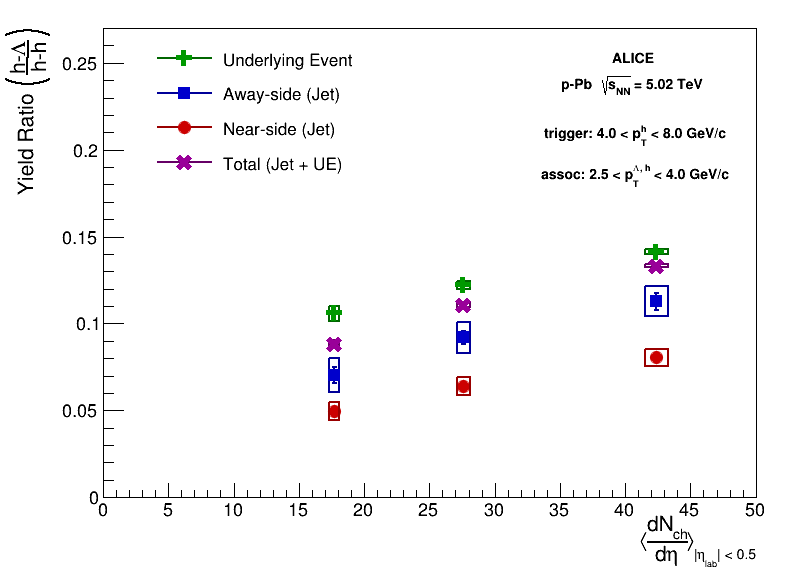

In [6]:
near_ratio_graph.SetMarkerStyle(20)
near_ratio_graph.SetMarkerSize(1.5)
near_ratio_graph.SetMarkerColor(rt.kRed+1)
near_ratio_graph.SetLineColor(rt.kRed+2)
near_ratio_graph.SetLineWidth(2)
near_ratio_graph.GetXaxis().SetTitle("Multiplicity Percentile")
near_ratio_graph.GetXaxis().SetTitleSize(0.05)
near_ratio_graph.GetXaxis().SetLabelSize(0.04)
near_ratio_graph.GetXaxis().SetTitleOffset(0.9)
near_ratio_graph.GetXaxis().SetRangeUser(0.0, 50.0)
near_ratio_graph.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
near_ratio_graph.GetYaxis().SetTitleSize(0.04)
near_ratio_graph.GetYaxis().SetTitleOffset(1.5)
near_ratio_graph.GetYaxis().SetRangeUser(0.0002, 0.0035)

near_ratio_graph_final_syst.SetMarkerStyle(20)
near_ratio_graph_final_syst.SetMarkerSize(0)
near_ratio_graph_final_syst.SetMarkerColor(rt.kRed+1)
near_ratio_graph_final_syst.SetLineColor(rt.kRed+2)
near_ratio_graph_final_syst.SetLineWidth(2)
near_ratio_graph_final_syst.SetFillStyle(0)


away_ratio_graph.SetMarkerStyle(21)
away_ratio_graph.SetMarkerSize(1.5)
away_ratio_graph.SetMarkerColor(rt.kBlue+1)
away_ratio_graph.SetLineColor(rt.kBlue+2)
away_ratio_graph.SetLineWidth(2)

away_ratio_graph_final_syst.SetMarkerStyle(21)
away_ratio_graph_final_syst.SetMarkerSize(0)
away_ratio_graph_final_syst.SetMarkerColor(rt.kBlue+1)
away_ratio_graph_final_syst.SetLineColor(rt.kBlue+2)
away_ratio_graph_final_syst.SetLineWidth(2)
away_ratio_graph_final_syst.SetFillStyle(0)

ue_ratio_graph.SetMarkerStyle(34)
ue_ratio_graph.SetMarkerSize(2)
ue_ratio_graph.SetMarkerColor(rt.kGreen+2)
ue_ratio_graph.SetLineColor(rt.kGreen+3)
ue_ratio_graph.SetLineWidth(2)

ue_ratio_graph_final_syst.SetMarkerSize(0)
ue_ratio_graph_final_syst.SetMarkerColor(rt.kGreen+2)
ue_ratio_graph_final_syst.SetLineColor(rt.kGreen+3)
ue_ratio_graph_final_syst.SetLineWidth(2)
ue_ratio_graph_final_syst.SetFillStyle(0)

total_ratio_graph.SetMarkerStyle(47)
total_ratio_graph.SetMarkerSize(2)
total_ratio_graph.SetMarkerColor(rt.kMagenta+2)
total_ratio_graph.SetLineColor(rt.kMagenta+3)
total_ratio_graph.SetLineWidth(2)
total_ratio_graph.SetFillColor(rt.kMagenta+1)
total_ratio_graph.SetFillStyle(3144)

total_ratio_graph_final_syst.SetMarkerSize(0)
total_ratio_graph_final_syst.SetMarkerColor(rt.kMagenta+2)
total_ratio_graph_final_syst.SetLineColor(rt.kMagenta+3)
total_ratio_graph_final_syst.SetLineWidth(2)
total_ratio_graph_final_syst.SetFillColor(rt.kMagenta+1)
total_ratio_graph_final_syst.SetFillStyle(0)

ratios_legend = rt.TLegend(0.183, 0.686, 0.461, 0.928)
ratios_legend.SetMargin(0.35)
ratios_legend.AddEntry(ue_ratio_graph, "Underlying Event", "pl")
ratios_legend.AddEntry(away_ratio_graph, "Away-side (Jet)", "pl")
ratios_legend.AddEntry(near_ratio_graph, "Near-side (Jet)", "pl")
ratios_legend.AddEntry(total_ratio_graph, "Total (Jet + UE)", "pl")
ratios_legend.SetLineWidth(0)

pt_range_label = rt.TPaveText(0.6687, 0.6585, 0.9282, 0.7979, "NDC")
pt_range_label.AddText("trigger: 4.0 < p_{T}^{h} < 8.0 GeV/c")
if lambda_phi_ratio:
    if is_low_pt:
        pt_range_label.AddText("assoc: 1.5 < p_{T}^{#Lambda, #phi(1020)} < 2.5 GeV/c")
    elif is_high_pt:
        pt_range_label.AddText("assoc: 2.5 < p_{T}^{#Lambda, #phi(1020)} < 4.0 GeV/c")
    else:
        pt_range_label.AddText("assoc: 2.0 < p_{T}^{#Lambda, #phi(1020)} < 4.0 GeV/c")
else:
    if is_low_pt:
        pt_range_label.AddText("assoc: 1.5 < p_{T}^{#Lambda, h} < 2.5 GeV/c")
    elif is_high_pt:
        pt_range_label.AddText("assoc: 2.5 < p_{T}^{#Lambda, h} < 4.0 GeV/c")
    else:
        pt_range_label.AddText("assoc: 2.0 < p_{T}^{#Lambda, h} < 4.0 GeV/c")
pt_range_label.SetTextSizePixels(18)
pt_range_label.SetFillColor(rt.kWhite)
pt_range_label.SetBorderSize(0)

alice_data_label = rt.TPaveText(0.6982, 0.8258, 0.8987, 0.9251, "NDC")
alice_data_label.AddText("ALICE")
alice_data_label.AddText("p-Pb #sqrt{s_{NN}} = 5.02 TeV")
alice_data_label.GetLine(0).SetTextSizePixels(32)
alice_data_label.GetLine(1).SetTextSizePixels(24)
alice_data_label.SetBorderSize(0)
alice_data_label.SetFillColor(rt.kWhite)

if use_new_x_axis:
    plotting_hist = rt.TH1D("plotting_hist", "", 65, 0, 65)
    plotting_hist.SetMarkerStyle(20)
    plotting_hist.SetMarkerSize(1)
    plotting_hist.SetMarkerColor(rt.kRed+1)
    plotting_hist.SetLineColor(rt.kRed+2)
    plotting_hist.SetLineWidth(2)
    plotting_hist.GetXaxis().SetTitle("#LT#frac{dN_{ch}}{d#eta}#GT_{|#eta_{lab}| < 0.5}")
    plotting_hist.GetXaxis().SetTitleSize(0.04)
    plotting_hist.GetXaxis().SetLabelSize(0.035)
    plotting_hist.GetXaxis().SetTitleOffset(1.2)
    plotting_hist.GetXaxis().SetRangeUser(0.0, 50.0)
    if lambda_phi_ratio:
        plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-#phi}#right)")
    else:
        plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
    plotting_hist.GetYaxis().SetTitleSize(0.04)
    plotting_hist.GetYaxis().SetTitleOffset(1.5)
    plotting_hist.Draw("PE")
else:
    mult_bin_widths = arr.array('d', [0.0, 20.0, 50.0, 80.0, 100.0])
    plotting_hist = rt.TH1D("plotting_hist", "", 4, mult_bin_widths)
    plotting_hist.SetMarkerStyle(20)
    plotting_hist.SetMarkerSize(1)
    plotting_hist.SetMarkerColor(rt.kRed+1)
    plotting_hist.SetLineColor(rt.kRed+2)
    plotting_hist.SetLineWidth(2)
    plotting_hist.GetXaxis().SetTitle("Multiplicity Percentile")
    plotting_hist.GetXaxis().SetTitleSize(0.05)
    plotting_hist.GetXaxis().SetLabelSize(0.04)
    plotting_hist.GetXaxis().SetTitleOffset(1.2)
    plotting_hist.GetXaxis().SetRangeUser(0.0, 100.0)
    plotting_hist.SetStats(0)
    if lambda_phi_ratio:
        plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-#phi}#right)")
    else:
        plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
    plotting_hist.GetYaxis().SetTitleSize(0.04)
    plotting_hist.GetYaxis().SetTitleOffset(1.5)
    plotting_hist.SetStats(0)
    plotting_hist.Draw("PE")
    plotting_hist.GetXaxis().SetLabelOffset(999)
    plotting_hist.GetXaxis().SetTickSize(0)
    rt.gPad.Update()
    new_axis = rt.TGaxis(rt.gPad.GetUxmax(),
            rt.gPad.GetUymin(),
            rt.gPad.GetUxmin(),
            rt.gPad.GetUymin(),
            plotting_hist.GetXaxis().GetXmin(),
            plotting_hist.GetXaxis().GetXmax(),
            510,"-")
    new_axis.SetLabelOffset(-0.03)
    new_axis.Draw("SAME")

if lambda_phi_ratio:
    if is_low_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 20)
    elif is_high_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 13)
    else:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 15)
else:
    if is_low_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 0.2)
    elif is_high_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 0.27)
    else:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 0.25)
plotting_hist.SetStats(0)

near_ratio_graph.Draw("PE SAME")
near_ratio_graph_final_syst.Draw("E2 SAME")
away_ratio_graph_final_syst.Draw("E2 SAME")
away_ratio_graph.Draw("PE SAME")
ue_ratio_graph_final_syst.Draw("E2 SAME")
ue_ratio_graph.Draw("PE SAME")
total_ratio_graph_final_syst.Draw("E2 SAME")
total_ratio_graph.Draw("PE SAME")
ratios_legend.Draw()
pt_range_label.Draw()
alice_data_label.Draw()
c.Draw()

if lambda_phi_ratio:
    if use_new_x_axis:
        if is_low_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_lowpt.pdf")
        elif is_high_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_highpt.pdf")
        else:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis.pdf")
    else:
        if is_low_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_lowpt.pdf")
        elif is_high_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_highpt.pdf")
        else:
            c.SaveAs("figures/lambda_phi_ratio_plot.pdf")
else:
    if use_new_x_axis:
        if is_low_pt:
            c.SaveAs("figures/ratio_plot_new_x_axis_lowpt.pdf")
        elif is_high_pt:
            c.SaveAs("figures/ratio_plot_new_x_axis_highpt.pdf")
        else:
            c.SaveAs("figures/ratio_plot_new_x_axis.pdf")
    else:
        if is_low_pt:
            c.SaveAs("figures/ratio_plot_lowpt.pdf")
        elif is_high_pt:
            c.SaveAs("figures/ratio_plot_highpt.pdf")
        else:
            c.SaveAs("figures/ratio_plot.pdf")


In [7]:
# near_ue_ratio_graph.SetMarkerStyle(20)
# near_ue_ratio_graph.SetMarkerSize(1.5)
# near_ue_ratio_graph.SetMarkerColor(rt.kYellow+1)
# near_ue_ratio_graph.SetLineColor(rt.kYellow + 2)
# near_ue_ratio_graph.SetLineWidth(2)
# near_ue_ratio_graph.GetXaxis().SetTitle("Multiplicity Percentile")
# near_ue_ratio_graph.GetXaxis().SetTitleSize(0.05)
# near_ue_ratio_graph.GetXaxis().SetLabelSize(0.04)
# near_ue_ratio_graph.GetXaxis().SetTitleOffset(0.9)
# near_ue_ratio_graph.GetXaxis().SetRangeUser(0.0, 100.0)
# near_ue_ratio_graph.GetYaxis().SetTitle("Yield ratio #left(#frac{h-#Lambda}{h-h}#right)")
# near_ue_ratio_graph.GetYaxis().SetTitleSize(0.04)
# near_ue_ratio_graph.GetYaxis().SetTitleOffset(1.5)
# near_ue_ratio_graph.GetYaxis().SetRangeUser(0.0002, 0.0035)

# near_ue_ratio_graph_final_syst.SetMarkerStyle(20)
# near_ue_ratio_graph_final_syst.SetMarkerSize(0)
# near_ue_ratio_graph_final_syst.SetMarkerColor(rt.kYellow + 1)
# near_ue_ratio_graph_final_syst.SetLineColor(rt.kYellow + 2)
# near_ue_ratio_graph_final_syst.SetLineWidth(2)
# near_ue_ratio_graph_final_syst.SetFillStyle(0)


# away_ue_ratio_graph.SetMarkerStyle(21)
# away_ue_ratio_graph.SetMarkerSize(1.5)
# away_ue_ratio_graph.SetMarkerColor(rt.kCyan-3)
# away_ue_ratio_graph.SetLineColor(rt.kCyan - 2)
# away_ue_ratio_graph.SetLineWidth(2)

# away_ue_ratio_graph_final_syst.SetMarkerStyle(21)
# away_ue_ratio_graph_final_syst.SetMarkerSize(0)
# away_ue_ratio_graph_final_syst.SetMarkerColor(rt.kCyan-3)
# away_ue_ratio_graph_final_syst.SetLineColor(rt.kCyan - 2)
# away_ue_ratio_graph_final_syst.SetLineWidth(2)
# away_ue_ratio_graph_final_syst.SetFillStyle(0)




# ratios_legend = rt.TLegend(0.183, 0.686, 0.461, 0.928)
# ratios_legend.SetMargin(0.35)
# ratios_legend.AddEntry(away_ue_ratio_graph, "Away-side/UE", "pl")
# ratios_legend.AddEntry(near_ue_ratio_graph, "Near-side/UE", "pl")
# ratios_legend.SetLineWidth(0)

# pt_range_label = rt.TPaveText(0.6687, 0.6585, 0.9282, 0.7979, "NDC")
# pt_range_label.AddText("trigger: 4.0 < p_{T}^{h} < 8.0 GeV/c")
# if lambda_phi_ratio:
#     if is_low_pt:
#         pt_range_label.AddText("assoc: 1.5 < p_{T}^{#Lambda, #phi(1020)} < 2.5 GeV/c")
#     elif is_high_pt:
#         pt_range_label.AddText("assoc: 2.5 < p_{T}^{#Lambda, #phi(1020)} < 4.0 GeV/c")
#     else:
#         pt_range_label.AddText("assoc: 2.0 < p_{T}^{#Lambda, #phi(1020)} < 4.0 GeV/c")
# else:
#     if is_low_pt:
#         pt_range_label.AddText("assoc: 1.5 < p_{T}^{#Lambda, h} < 2.5 GeV/c")
#     elif is_high_pt:
#         pt_range_label.AddText("assoc: 2.5 < p_{T}^{#Lambda, h} < 4.0 GeV/c")
#     else:
#         pt_range_label.AddText("assoc: 2.0 < p_{T}^{#Lambda, h} < 4.0 GeV/c")
# pt_range_label.SetTextSizePixels(18)
# pt_range_label.SetFillColor(rt.kWhite)
# pt_range_label.SetBorderSize(0)

# alice_data_label = rt.TPaveText(0.6982, 0.8258, 0.8987, 0.9251, "NDC")
# alice_data_label.AddText("ALICE")
# alice_data_label.AddText("p-Pb #sqrt{s_{NN}} = 5.02 TeV")
# alice_data_label.GetLine(0).SetTextSizePixels(32)
# alice_data_label.GetLine(1).SetTextSizePixels(24)
# alice_data_label.SetBorderSize(0)
# alice_data_label.SetFillColor(rt.kWhite)

# if use_new_x_axis:
#     plotting_hist = rt.TH1D("plotting_hist", "", 65, 0, 65)
#     plotting_hist.SetMarkerStyle(20)
#     plotting_hist.SetMarkerSize(1)
#     plotting_hist.SetMarkerColor(rt.kRed+1)
#     plotting_hist.SetLineColor(rt.kRed+2)
#     plotting_hist.SetLineWidth(2)
#     plotting_hist.GetXaxis().SetTitle("#LT#it{N}_{ch}#GT_{|#eta| < 0.8}")
#     plotting_hist.GetXaxis().SetTitleSize(0.04)
#     plotting_hist.GetXaxis().SetLabelSize(0.035)
#     plotting_hist.GetXaxis().SetTitleOffset(1.2)
#     plotting_hist.GetXaxis().SetRangeUser(0.0, 100.0)
#     if lambda_phi_ratio:
#         plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-#phi}#right)")
#     else:
#         plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
#     plotting_hist.GetYaxis().SetTitleSize(0.04)
#     plotting_hist.GetYaxis().SetTitleOffset(1.5)
#     plotting_hist.Draw("PE")
# else:
#     mult_bin_widths = arr.array('d', [0.0, 20.0, 50.0, 80.0, 100.0])
#     plotting_hist = rt.TH1D("plotting_hist", "", 4, mult_bin_widths)
#     plotting_hist.SetMarkerStyle(20)
#     plotting_hist.SetMarkerSize(1)
#     plotting_hist.SetMarkerColor(rt.kRed+1)
#     plotting_hist.SetLineColor(rt.kRed+2)
#     plotting_hist.SetLineWidth(2)
#     plotting_hist.GetXaxis().SetTitle("Multiplicity Percentile")
#     plotting_hist.GetXaxis().SetTitleSize(0.05)
#     plotting_hist.GetXaxis().SetLabelSize(0.04)
#     plotting_hist.GetXaxis().SetTitleOffset(1.2)
#     plotting_hist.GetXaxis().SetRangeUser(0.0, 100.0)
#     plotting_hist.SetStats(0)
#     if lambda_phi_ratio:
#         plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-#phi}#right)")
#     else:
#         plotting_hist.GetYaxis().SetTitle("Ratio of Ratio #left(#frac{h-#Lambda}{h-h}#right)_{jet}/#left(#frac{h-#Lambda}{h-h}#right)_{UE}")
#     plotting_hist.GetYaxis().SetTitleSize(0.04)
#     plotting_hist.GetYaxis().SetTitleOffset(1.5)
#     plotting_hist.SetStats(0)
#     plotting_hist.Draw("PE")
#     plotting_hist.GetXaxis().SetLabelOffset(999)
#     plotting_hist.GetXaxis().SetTickSize(0)
#     rt.gPad.Update()
#     new_axis = rt.TGaxis(rt.gPad.GetUxmax(),
#             rt.gPad.GetUymin(),
#             rt.gPad.GetUxmin(),
#             rt.gPad.GetUymin(),
#             plotting_hist.GetXaxis().GetXmin(),
#             plotting_hist.GetXaxis().GetXmax(),
#             510,"-")
#     new_axis.SetLabelOffset(-0.03)
#     new_axis.Draw("SAME")

# if lambda_phi_ratio:
#     if is_low_pt:
#         plotting_hist.GetYaxis().SetRangeUser(0.0, 18)
#     elif is_high_pt:
#         plotting_hist.GetYaxis().SetRangeUser(0.0, 11)
#     else:
#         plotting_hist.GetYaxis().SetRangeUser(0.0, 13)
# else:
#     if is_low_pt:
#         plotting_hist.GetYaxis().SetRangeUser(0.0, 1.6)
#     elif is_high_pt:
#         plotting_hist.GetYaxis().SetRangeUser(0.0, 1.6)
#     else:
#         plotting_hist.GetYaxis().SetRangeUser(0.0, 1.6)
# plotting_hist.SetStats(0)

# near_ue_ratio_graph.Draw("PE SAME")
# near_ue_ratio_graph_final_syst.Draw("E2 SAME")
# away_ue_ratio_graph_final_syst.Draw("E2 SAME")
# away_ue_ratio_graph.Draw("PE SAME")
# ratios_legend.Draw()
# pt_range_label.Draw()
# alice_data_label.Draw()
# c.Draw()

# if lambda_phi_ratio:
#     if use_new_x_axis:
#         if is_low_pt:
#             c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_lowpt.pdf")
#         elif is_high_pt:
#             c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_highpt.pdf")
#         else:
#             c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis.pdf")
#     else:
#         if is_low_pt:
#             c.SaveAs("figures/lambda_phi_ratio_plot_lowpt.pdf")
#         elif is_high_pt:
#             c.SaveAs("figures/lambda_phi_ratio_plot_highpt.pdf")
#         else:
#             c.SaveAs("figures/lambda_phi_ratio_plot.pdf")
# else:
#     if use_new_x_axis:
#         if is_low_pt:
#             c.SaveAs("figures/ratio_plot_new_x_axis_lowpt.pdf")
#         elif is_high_pt:
#             c.SaveAs("figures/ratio_plot_new_x_axis_highpt.pdf")
#         else:
#             c.SaveAs("figures/ratio_plot_new_x_axis.pdf")
#     else:
#         if is_low_pt:
#             c.SaveAs("figures/ratio_ratio_plot_lowpt.pdf")
#         elif is_high_pt:
#             c.SaveAs("figures/ratio_ratio_plot_highpt.pdf")
#         else:
#             c.SaveAs("figures/ratio_ratio_plot.pdf")


near slope: 1.25e-03 \pm 2.90e-04
away slope: 1.67e-03 \pm 5.25e-04
ue slope: 1.37e-03 \pm 1.64e-04
total slope: 1.78e-03 \pm 1.14e-04
 FCN=0.124066 FROM MIGRAD    STATUS=CONVERGED      49 CALLS          50 TOTAL
                     EDM=1.38478e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           2.82222e-02   9.02909e-03   1.53785e-06   1.40353e-02
   2  p1           1.24665e-03   2.90378e-04   4.94588e-08   5.22710e-01
 FCN=0.15971 FROM MIGRAD    STATUS=CONVERGED      48 CALLS          49 TOTAL
                     EDM=2.76595e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.28057e-02   1.67739e-02   2.78910e-06  -6.40949e-02
   2  p1           1.67474e-03   5.24538e-0

Info in <TCanvas::Print>: pdf file figures/ratio_plot_new_x_axis_highpt_with_fits.pdf has been created


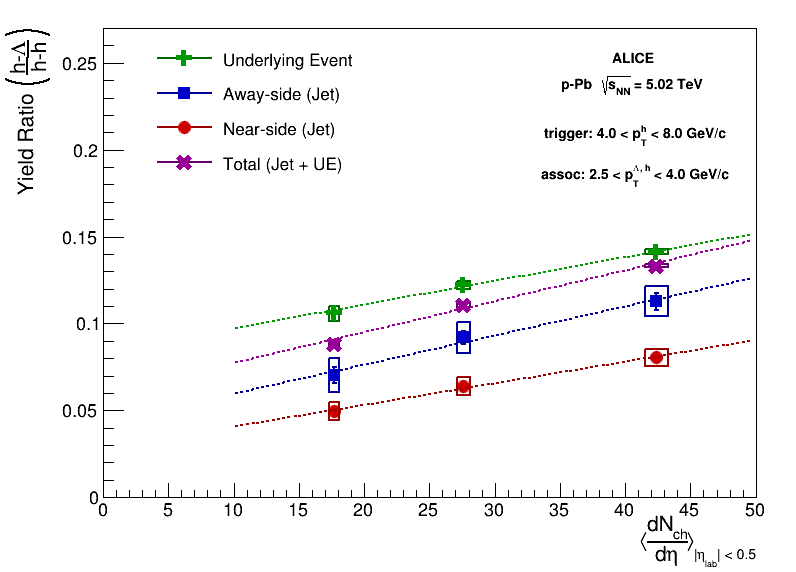

In [8]:
if use_new_x_axis:
    near_fit = rt.TF1("near_fit", "pol1", 10, 55)
    away_fit = rt.TF1("away_fit", "pol1", 10, 55)
    ue_fit = rt.TF1("ue_fit", "pol1", 10, 55)
    total_fit = rt.TF1("total_fit", "pol1", 10, 55)

    near_fit.SetLineColor(rt.kRed+2)
    near_fit.SetLineWidth(2)
    near_fit.SetLineStyle(2)

    away_fit.SetLineColor(rt.kBlue+2)
    away_fit.SetLineWidth(2)
    away_fit.SetLineStyle(2)

    ue_fit.SetLineColor(rt.kGreen+2)
    ue_fit.SetLineWidth(2)
    ue_fit.SetLineStyle(2)

    total_fit.SetLineColor(rt.kMagenta+2)
    total_fit.SetLineWidth(2)
    total_fit.SetLineStyle(2)

    near_ratio_graph_final_syst.Fit(near_fit, "R")
    away_ratio_graph_final_syst.Fit(away_fit, "R")
    ue_ratio_graph_final_syst.Fit(ue_fit, "R")
    total_ratio_graph_final_syst.Fit(total_fit, "R")

    near_fit.Draw("SAME")
    away_fit.Draw("SAME")
    ue_fit.Draw("SAME")
    total_fit.Draw("SAME")

    c.Draw()
    if lambda_phi_ratio:

        if is_low_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_lowpt_with_fits.pdf")
        elif is_high_pt:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_highpt_with_fits.pdf")
        else:
            c.SaveAs("figures/lambda_phi_ratio_plot_new_x_axis_with_fits.pdf")
    else:
        if is_low_pt:
            c.SaveAs("figures/ratio_plot_new_x_axis_lowpt_with_fits.pdf")
        elif is_high_pt:
            c.SaveAs("figures/ratio_plot_new_x_axis_highpt_with_fits.pdf")
        else:
            c.SaveAs("figures/ratio_plot_new_x_axis_with_fits.pdf")

    near_fit_slope = near_fit.GetParameter(1)
    near_fit_slope_err = near_fit.GetParError(1)

    away_fit_slope = away_fit.GetParameter(1)
    away_fit_slope_err = away_fit.GetParError(1)

    ue_fit_slope = ue_fit.GetParameter(1)
    ue_fit_slope_err = ue_fit.GetParError(1)

    total_fit_slope = total_fit.GetParameter(1)
    total_fit_slope_err = total_fit.GetParError(1)


    print(f"near slope: {near_fit_slope:.2e} \\pm {near_fit_slope_err:.2e}")
    print(f"away slope: {away_fit_slope:.2e} \\pm {away_fit_slope_err:.2e}")
    print(f"ue slope: {ue_fit_slope:.2e} \\pm {ue_fit_slope_err:.2e}")
    print(f"total slope: {total_fit_slope:.2e} \\pm {total_fit_slope_err:.2e}")



In [9]:
hh_near_graph_final_syst.SetMarkerSize(0)
hh_near_graph_final_syst.SetLineColor(rt.kRed + 3)
hh_near_graph_final_syst.SetFillColor(rt.kRed + 3)
hh_near_graph_final_syst.SetFillStyle(0)
hh_near_graph_final_syst.SetLineWidth(2)
hh_near_graph_final_syst.GetXaxis().SetTitle("Multiplicity Percentile")
hh_near_graph_final_syst.GetXaxis().SetTitleSize(0.05)
hh_near_graph_final_syst.GetXaxis().SetLabelSize(0.04)
hh_near_graph_final_syst.GetXaxis().SetTitleOffset(0.9)
hh_near_graph_final_syst.GetXaxis().SetRangeUser(0.0, 100.0)
hh_near_graph_final_syst.GetYaxis().SetTitle("Per-trigger pairwise yield)")
hh_near_graph_final_syst.GetYaxis().SetTitleSize(0.04)
hh_near_graph_final_syst.GetYaxis().SetTitleOffset(1.5)
hh_near_graph_final_syst.GetYaxis().SetRangeUser(0.0002, 0.0035)

In [10]:
hh_near_graph.SetMarkerStyle(20)
hh_near_graph.SetMarkerSize(1)
hh_near_graph.SetMarkerColor(rt.kRed + 3)
hh_near_graph.SetLineColor(rt.kRed + 3)
hh_near_graph.SetFillColor(rt.kRed + 3)
hh_near_graph.SetFillStyle(3001)
hh_near_graph.SetLineWidth(2)
hh_near_graph.GetXaxis().SetTitle("Multiplicity Percentile")
hh_near_graph.GetXaxis().SetTitleSize(0.05)
hh_near_graph.GetXaxis().SetLabelSize(0.04)
hh_near_graph.GetXaxis().SetTitleOffset(0.9)
hh_near_graph.GetXaxis().SetRangeUser(0.0, 100.0)
hh_near_graph.GetYaxis().SetTitle("Per-trigger pairwise yield)")
hh_near_graph.GetYaxis().SetTitleSize(0.04)
hh_near_graph.GetYaxis().SetTitleOffset(1.5)
hh_near_graph.GetYaxis().SetRangeUser(0.0002, 0.0035)

In [11]:
near_graph_final_syst.SetMarkerSize(0)
near_graph_final_syst.SetFillColor(rt.kPink-1)
near_graph_final_syst.SetLineColor(rt.kPink-1)
near_graph_final_syst.SetFillStyle(0)
near_graph_final_syst.SetLineWidth(2)
near_graph_final_syst.GetXaxis().SetTitle("Multiplicity Percentile")
near_graph_final_syst.GetXaxis().SetTitleSize(0.05)
near_graph_final_syst.GetXaxis().SetLabelSize(0.04)
near_graph_final_syst.GetXaxis().SetTitleOffset(0.9)
near_graph_final_syst.GetXaxis().SetRangeUser(0.0, 100.0)
near_graph_final_syst.GetYaxis().SetTitle("Per-trigger pairwise yield)")
near_graph_final_syst.GetYaxis().SetTitleSize(0.04)
near_graph_final_syst.GetYaxis().SetTitleOffset(1.5)
near_graph_final_syst.GetYaxis().SetRangeUser(0.0002, 0.0035)

In [12]:
near_graph.SetMarkerStyle(21)
near_graph.SetMarkerSize(1)
near_graph.SetMarkerColor(rt.kPink-1)
near_graph.SetLineColor(rt.kPink-1)
near_graph.SetFillColor(rt.kPink-1)
near_graph.SetFillStyle(3001)
near_graph.SetLineWidth(2)
near_graph.GetXaxis().SetTitle("Multiplicity Percentile")
near_graph.GetXaxis().SetTitleSize(0.05)
near_graph.GetXaxis().SetLabelSize(0.04)
near_graph.GetXaxis().SetTitleOffset(0.9)
near_graph.GetXaxis().SetRangeUser(0.0, 100.0)
near_graph.GetYaxis().SetTitle("Per-trigger pairwise yield)")
near_graph.GetYaxis().SetTitleSize(0.04)
near_graph.GetYaxis().SetTitleOffset(1.5)
near_graph.GetYaxis().SetRangeUser(0.0002, 0.0035)

In [13]:
hh_away_graph_final_syst.SetMarkerSize(0)
hh_away_graph_final_syst.SetLineWidth(2)
hh_away_graph_final_syst.SetLineColor(rt.kViolet - 6)
hh_away_graph_final_syst.SetFillColor(rt.kViolet - 6)
hh_away_graph_final_syst.SetFillStyle(0)

In [14]:
hh_away_graph.SetMarkerStyle(20)
hh_away_graph.SetMarkerSize(1)
hh_away_graph.SetMarkerColor(rt.kViolet - 6)
hh_away_graph.SetLineColor(rt.kViolet - 6)
hh_away_graph.SetLineWidth(2)
hh_away_graph.SetFillColor(rt.kViolet - 6)
hh_away_graph.SetFillStyle(3001)

In [15]:
away_graph_final_syst.SetMarkerSize(0)
away_graph_final_syst.SetLineWidth(2)
away_graph_final_syst.SetLineColor(rt.kBlue-2)
away_graph_final_syst.SetFillColor(rt.kBlue - 2)
away_graph_final_syst.SetFillStyle(0)

In [16]:
away_graph.SetMarkerStyle(21)
away_graph.SetMarkerSize(1)
away_graph.SetMarkerColor(rt.kBlue-2)
away_graph.SetLineColor(rt.kBlue-2)
away_graph.SetLineWidth(2)
away_graph.SetFillColor(rt.kBlue - 2)
away_graph.SetFillStyle(3001)

In [17]:
ratios_legend = rt.TLegend(0.183, 0.686, 0.461, 0.928)
ratios_legend.SetMargin(0.35)
ratios_legend.AddEntry(hh_near_graph, "h-h near-side yield", "pl")
ratios_legend.AddEntry(hh_away_graph, "h-h away-side yield" , "pl")

ratios_legend.AddEntry(near_graph, "h-#Lambda near-side yield (x30)", "pl")
ratios_legend.AddEntry(away_graph, "h-#Lambda away-side yield (x30)" , "pl")

# ratios_legend.AddEntry(near_graph, "h-#Lambda near-side yield (x30)", "pl")
# ratios_legend.AddEntry(away_graph, "h-#Lambda away-side yield (x30)" , "pl")

ratios_legend.SetLineWidth(0)

In [18]:
pt_range_label = rt.TPaveText(0.6687, 0.6585, 0.9282, 0.7979, "NDC")
pt_range_label.AddText("trigger: 4.0 < p_{T}^{h} < 8.0 GeV/c")
if is_low_pt:
    pt_range_label.AddText("assoc: 1.5 < p_{T}^{h,#Lambda} < 2.5 GeV/c")
elif is_high_pt:
    pt_range_label.AddText("assoc: 2.5 < p_{T}^{h,#Lambda} < 4.0 GeV/c")
else:
    pt_range_label.AddText("assoc: 2.0 < p_{T}^{h,#Lambda} < 4.0 GeV/c")
pt_range_label.SetTextSizePixels(18)
pt_range_label.SetFillColor(rt.kWhite)
pt_range_label.SetBorderSize(0)

In [19]:
alice_data_label = rt.TPaveText(0.6982, 0.8258, 0.8987, 0.9251, "NDC")
alice_data_label.AddText("ALICE")
alice_data_label.AddText("p-Pb #sqrt{s_{NN}} = 5.02 TeV")
alice_data_label.GetLine(0).SetTextSizePixels(32)
alice_data_label.GetLine(1).SetTextSizePixels(24)
alice_data_label.SetBorderSize(0)
alice_data_label.SetFillColor(rt.kWhite)

In [20]:
if use_new_x_axis:
    plotting_hist = rt.TH1D("plotting_hist", "", 65, 0, 65)
    plotting_hist.SetMarkerStyle(20)
    plotting_hist.SetMarkerSize(1)
    plotting_hist.SetMarkerColor(rt.kRed+1)
    plotting_hist.SetLineColor(rt.kRed+2)
    plotting_hist.SetLineWidth(2)
    plotting_hist.GetXaxis().SetTitle("#LT#frac{dN_{ch}}{d#eta}#GT_{|#eta_{lab}| < 0.5}")
    plotting_hist.GetXaxis().SetTitleSize(0.04)
    plotting_hist.GetXaxis().SetLabelSize(0.035)
    plotting_hist.GetXaxis().SetTitleOffset(1.2)
    plotting_hist.GetXaxis().SetRangeUser(5, 55)
    if lambda_phi_ratio:
        plotting_hist.GetYaxis().SetTitle("Per-trigger pairwise yield")
    else:
        plotting_hist.GetYaxis().SetTitle("Per-trigger pairwise yield")
    plotting_hist.GetYaxis().SetTitleSize(0.04)
    plotting_hist.GetYaxis().SetTitleOffset(1.5)

    if is_low_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 1.5)
    elif is_high_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 0.8)
    else:  
        plotting_hist.GetYaxis().SetRangeUser(0.0, 1.5)

    plotting_hist.Draw("PE")
else:
    mult_bin_widths = arr.array('d', [0.0, 20.0, 50.0, 80.0, 100.0])
    plotting_hist = rt.TH1D("plotting_hist", "", 4, mult_bin_widths)
    plotting_hist.SetMarkerStyle(20)
    plotting_hist.SetMarkerSize(1)
    plotting_hist.SetMarkerColor(rt.kRed+1)
    plotting_hist.SetLineColor(rt.kRed+2)
    plotting_hist.SetLineWidth(2)
    plotting_hist.GetXaxis().SetTitle("Multiplicity Percentile")
    plotting_hist.GetXaxis().SetTitleSize(0.05)
    plotting_hist.GetXaxis().SetLabelSize(0.04)
    plotting_hist.GetXaxis().SetTitleOffset(1.2)
    plotting_hist.GetXaxis().SetRangeUser(0.0, 100.0)
    plotting_hist.SetStats(0)
    if lambda_phi_ratio:
        plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-#phi}#right)")
    else:
        plotting_hist.GetYaxis().SetTitle("Yield Ratio #left(#frac{h-#Lambda}{h-h}#right)")
    plotting_hist.GetYaxis().SetTitleSize(0.04)
    plotting_hist.GetYaxis().SetTitleOffset(1.5)
    plotting_hist.SetStats(0)

    if is_low_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 1.5)
    elif is_high_pt:
        plotting_hist.GetYaxis().SetRangeUser(0.0, 0.8)
    else:  
        plotting_hist.GetYaxis().SetRangeUser(0.0, 1.5)

    plotting_hist.Draw("PE")
    plotting_hist.GetXaxis().SetLabelOffset(999)
    plotting_hist.GetXaxis().SetTickSize(0)
    rt.gPad.Update()
    new_axis = rt.TGaxis(rt.gPad.GetUxmax(),
            rt.gPad.GetUymin(),
            rt.gPad.GetUxmin(),
            rt.gPad.GetUymin(),
            plotting_hist.GetXaxis().GetXmin(),
            plotting_hist.GetXaxis().GetXmax(),
            510,"-")
    new_axis.SetLabelOffset(-0.03)
    new_axis.Draw("SAME")


Warning in <TFile::Append>: Replacing existing TH1: plotting_hist (Potential memory leak).


In [21]:
# scale the h-lambda graph points
SCALE_FACTOR = 30
for i in range(3):

        near_graph_final_syst.SetPoint(i, near_graph_final_syst.GetX()[i], near_graph_final_syst.GetY()[i] * SCALE_FACTOR)
        near_graph.SetPoint(i, near_graph.GetX()[i], near_graph.GetY()[i] * SCALE_FACTOR)
        near_graph_final_syst.SetPointError(i, near_graph_final_syst.GetEXlow()[i], near_graph_final_syst.GetEXhigh()[i], near_graph_final_syst.GetEYlow()[i] * SCALE_FACTOR, near_graph_final_syst.GetEYhigh()[i] * SCALE_FACTOR)
        near_graph.SetPointError(i, near_graph.GetErrorX(i), near_graph.GetErrorY(i) * SCALE_FACTOR)

        # hh_near_graph_final_syst.SetPoint(i, hh_near_graph_final_syst.GetX()[i], hh_near_graph_final_syst.GetY()[i] * SCALE_FACTOR)
        # hh_near_graph.SetPoint(i, hh_near_graph.GetX()[i], hh_near_graph.GetY()[i] * SCALE_FACTOR)
        # hh_near_graph_final_syst.SetPointError(i, hh_near_graph_final_syst.GetEXlow()[i], hh_near_graph_final_syst.GetEXhigh()[i], hh_near_graph_final_syst.GetEYlow()[i] * SCALE_FACTOR, hh_near_graph_final_syst.GetEYhigh()[i] * SCALE_FACTOR)
        # hh_near_graph.SetPointError(i, hh_near_graph.GetErrorX(i), hh_near_graph.GetErrorY(i) * SCALE_FACTOR)

        away_graph_final_syst.SetPoint(i, away_graph_final_syst.GetX()[i], away_graph_final_syst.GetY()[i] * SCALE_FACTOR)
        away_graph.SetPoint(i, away_graph.GetX()[i], away_graph.GetY()[i] * SCALE_FACTOR)
        away_graph_final_syst.SetPointError(i, away_graph_final_syst.GetEXlow()[i], away_graph_final_syst.GetEXhigh()[i], away_graph_final_syst.GetEYlow()[i] * SCALE_FACTOR, away_graph_final_syst.GetEYhigh()[i] * SCALE_FACTOR)
        away_graph.SetPointError(i, away_graph.GetErrorX(i), away_graph.GetErrorY(i) * SCALE_FACTOR)

        # hh_away_graph_final_syst.SetPoint(i, hh_away_graph_final_syst.GetX()[i], hh_away_graph_final_syst.GetY()[i] * SCALE_FACTOR)
        # hh_away_graph.SetPoint(i, hh_away_graph.GetX()[i], hh_away_graph.GetY()[i] * SCALE_FACTOR)
        # hh_away_graph_final_syst.SetPointError(i, hh_away_graph_final_syst.GetEXlow()[i], hh_away_graph_final_syst.GetEXhigh()[i], hh_away_graph_final_syst.GetEYlow()[i] * SCALE_FACTOR, hh_away_graph_final_syst.GetEYhigh()[i] * SCALE_FACTOR)
        # hh_away_graph.SetPointError(i, hh_away_graph.GetErrorX(i), hh_away_graph.GetErrorY(i) * SCALE_FACTOR)


Info in <TCanvas::Print>: pdf file figures/pairwise_plot_new_x_axis_highpt.pdf has been created


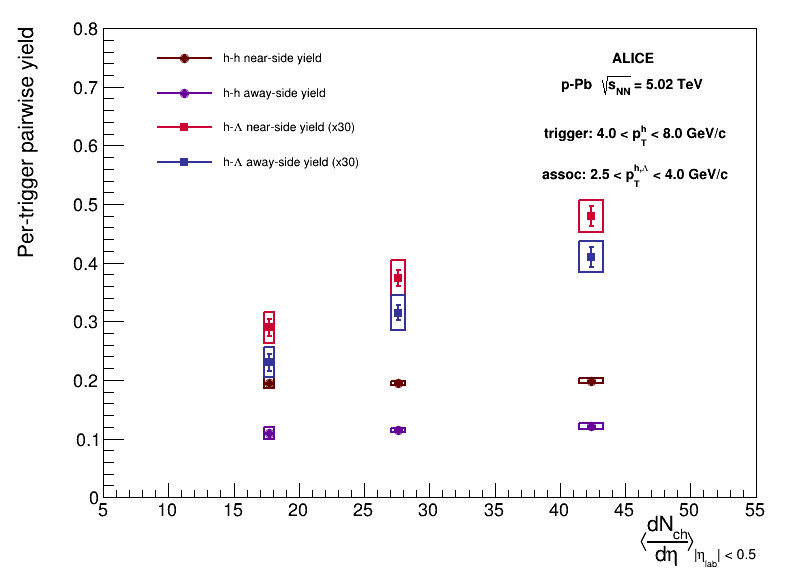

In [22]:
hh_near_graph_final_syst.Draw("E2")
hh_near_graph.Draw("PE SAME")
hh_away_graph_final_syst.Draw("E2")
hh_away_graph.Draw("PE SAME")


near_graph_final_syst.Draw("E2 SAME")
near_graph.Draw("PE SAME")
away_graph_final_syst.Draw("E2 SAME")
away_graph.Draw("PE SAME")
ratios_legend.Draw()
pt_range_label.Draw()
alice_data_label.Draw()
c.Draw()

if use_new_x_axis:
        if is_high_pt:
                c.SaveAs("figures/pairwise_plot_new_x_axis_highpt.pdf")
        elif is_low_pt:
                c.SaveAs("figures/pairwise_plot_new_x_axis_lowpt.pdf")
        else:
                c.SaveAs("figures/pairwise_plot_new_x_axis.pdf")
else:
        if is_high_pt:
                c.SaveAs("figures/pairwise_plot_highpt.pdf")
        elif is_low_pt:
                c.SaveAs("figures/pairwise_plot_lowpt.pdf")
        else:
                c.SaveAs("figures/pairwise_plot.pdf")

near slope: 7.68e-03 $\pm$ 1.56e-03
away slope: 7.26e-03 $\pm$ 1.51e-03
hh near slope: 2.30e-04 $\pm$ 3.38e-04
hh away slope: 4.90e-04 $\pm$ 3.36e-04
 FCN=0.0500575 FROM MIGRAD    STATUS=CONVERGED      46 CALLS          47 TOTAL
                     EDM=1.26697e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.56559e-01   4.76152e-02   8.08800e-06  -4.47777e-03
   2  p1           7.67700e-03   1.55556e-03   2.64197e-07  -4.49159e-01
 FCN=0.121823 FROM MIGRAD    STATUS=CONVERGED      46 CALLS          47 TOTAL
                     EDM=1.81551e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.05500e-01   4.60755e-02   8.17932e-06  -1.47431e-02
   2  p1           7.26202

Info in <TCanvas::Print>: pdf file figures/pairwise_plot_new_x_axis_highpt_with_fits.pdf has been created


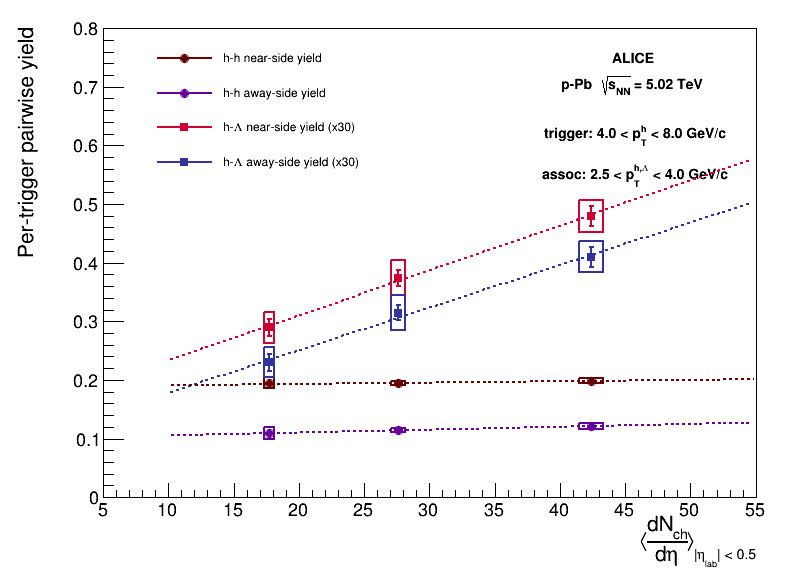

In [23]:
if use_new_x_axis:
    near_fit = rt.TF1("near_fit", "pol1", 10, 55)
    away_fit = rt.TF1("away_fit", "pol1", 10, 55)

    hh_near_fit = rt.TF1("hh_near_fit", "pol1", 10, 55)
    hh_away_fit = rt.TF1("hh_away_fit", "pol1", 10, 55)

    near_fit.SetLineColor(rt.kPink - 1)
    near_fit.SetLineWidth(2)
    near_fit.SetLineStyle(2)
    away_fit.SetLineColor(rt.kBlue-2)
    away_fit.SetLineWidth(2)
    away_fit.SetLineStyle(2)

    hh_near_fit.SetLineColor(rt.kRed + 3)
    hh_near_fit.SetLineWidth(2)
    hh_near_fit.SetLineStyle(2)
    hh_away_fit.SetLineColor(rt.kViolet - 6)
    hh_away_fit.SetLineWidth(2)
    hh_away_fit.SetLineStyle(2)



    near_graph_final_syst.Fit(near_fit, "R")
    away_graph_final_syst.Fit(away_fit, "R")
    hh_near_graph_final_syst.Fit(hh_near_fit, "R")
    hh_away_graph_final_syst.Fit(hh_away_fit, "R")

    near_fit.Draw("SAME")
    away_fit.Draw("SAME")
    hh_near_fit.Draw("SAME")
    hh_away_fit.Draw("SAME")

    c.Draw()
    if is_low_pt:
        c.SaveAs("figures/pairwise_plot_new_x_axis_lowpt_with_fits.pdf")
    elif is_high_pt:
        c.SaveAs("figures/pairwise_plot_new_x_axis_highpt_with_fits.pdf")
    else:
        c.SaveAs("figures/pairwise_plot_new_x_axis_with_fits.pdf")

    near_fit_slope = near_fit.GetParameter(1)
    near_fit_slope_err = near_fit.GetParError(1)

    away_fit_slope = away_fit.GetParameter(1)
    away_fit_slope_err = away_fit.GetParError(1)

    hh_near_fit_slope = hh_near_fit.GetParameter(1)
    hh_near_fit_slope_err = hh_near_fit.GetParError(1)

    hh_away_fit_slope = hh_away_fit.GetParameter(1)
    hh_away_fit_slope_err = hh_away_fit.GetParError(1)


    print(f"near slope: {near_fit_slope:.2e} $\\pm$ {near_fit_slope_err:.2e}")
    print(f"away slope: {away_fit_slope:.2e} $\\pm$ {away_fit_slope_err:.2e}")

    print(f"hh near slope: {hh_near_fit_slope:.2e} $\\pm$ {hh_near_fit_slope_err:.2e}")
    print(f"hh away slope: {hh_away_fit_slope:.2e} $\\pm$ {hh_away_fit_slope_err:.2e}")